# notebook description
This notebook is similar to the test_from_macaco.ipynb, but the methods are built inside the notebook. It is a better alternative to prototype new methods.

# build methods

In [377]:
%load_ext autoreload
%reload_ext autoreload
from dfbuild import *
import matplotlib.pyplot as plt

class dataframe():
    def __init__(self,initializer=None):
        self.df      = dfbuild()
        self.columns_dict = {}
        self.dimensions   = [0,0]
        self.indexes = []

        if initializer != None:
            for col in initializer:
                self.insert(str(col), initializer[col])

    def summary(self, info="info"):
        if info == "columns":
            result = list(self.columns_dict.keys())
            return result
        if info == "dtypes":
            for k, v in self.columns_dict.items():
                print('{:<5}'.format(k), v)
        if info == "info":
            print("RangeIndex: {} entries, 0 to {}".format(self.dimensions[0], self.dimensions[0]-1))
            print("Data columns (total {} columns):".format(self.dimensions[1]))
            for k, v in self.columns_dict.items():
                print('{}      {} non-null      '.format(k, sum(x is not None for x in self.tolist(k))), v)
            print('dtypes:', end=' ')
            for v in set(self.columns_dict.values()):
                print(v, end=', ')
                
    def check_size(self, array_values):
        if self.dimensions[0] != 0 and self.dimensions[0] != len(array_values):
            raise ValueError("Column size is not compatible with dataframe size.")        
    
    def insert(self,column,  array_values):
        self.check_size(array_values)
        for col_type in ['int', 'dbl']:
            if col_type == 'dbl':
                inst_type = '(int,float)'
            else: inst_type = col_type
            
            if all(isinstance(x, eval(inst_type)) for x in array_values):
                eval('self.df.insertCol{}(column,  array_values)'.format(col_type[0].upper()+col_type[1:]))
                self.columns_dict[column] = col_type
        
        col_type = 'str'
        if any(isinstance(x, eval(col_type)) for x in array_values):
            eval('self.df.insertCol{}(column,  array_values)'.format(col_type[0].upper()+col_type[1:]))
            self.columns_dict[column]  = col_type
            
        if self.dimensions[0] == 0 and self.dimensions[1] == 0:
            self.dimensions[0] = len(array_values)
        self.dimensions[1] = self.dimensions[1] + 1

    def remove(self,column):
        for col_type in ['int', 'dbl', 'str']:
            if self.columns_dict[column] == col_type:
                eval('self.df.removeCol{}(column)'.format(col_type[0].upper()+col_type[1:]))
                self.columns_dict.pop(column)
                self.dimensions[1] = self.dimensions[1] - 1
                break

    def toIndxCol(self, column):
        for col_type in ['int', 'dbl', 'str']:
            if self.columns_dict[column] == col_type:
                eval('self.df.toIndxCol{}(column)'.format(col_type[0].upper()+col_type[1:]))
                if column not in self.indexes:
                    self.indexes.append(column)
                
    def tolist(self,column):
        for col_type in ['int', 'dbl', 'str']:
            if self.columns_dict[column] == col_type:
                column_tolist = eval('self.df.locateCol{}(column)'.format(col_type[0].upper()+col_type[1:]))
                return column_tolist

    def locateCel(self,column,  loc_row):
        loc_rows = []
        if type(loc_row) != int:
            loc_rows = list(loc_row)
        else:
            loc_rows.append(loc_row)
        for col_type in ['int', 'dbl', 'str']:
            if self.columns_dict[column] == col_type:
                cel_val = eval('self.df.locateRow{}(column, loc_rows)'.format(col_type[0].upper()+col_type[1:]))
                return cel_val

    def locateRow(self, loc_row):
        row_query = {}
        for c in self.columns_dict:
            row_query[c] = []
        for column in self.columns_dict:
            row_query[column].append(self.locateCel(column,  loc_row))
        return row_query    

    def show(self, head = 10, col_max = 5):
        data_all = self.locateRow(range(0,self.dimensions[0]))
        print('dataframe is limited to {} rows and {} columns.'.format(head, col_max),'\n')
        print ('|      {:<10}'.format('index'), sep='', end =" ")
        count = 0
        for header in data_all.keys():
            print ('|      {:<10}'.format(header), sep='', end =" ")
            count += 1
            if count == col_max: break
        print(end ="\n")
        count = 0
        for i in range(len(data_all.items())+1):
            print('|      {:<10}'.format(' '), sep='', end =" ")
            count += 1
            if count == col_max: break
        print(end ="\n")
        row_count = 0
        
        for i in range(min(self.dimensions[0], head)):
            print('|      {:<10}'.format(i), end =" ")
            count = 0
            for v in data_all.values():
                print('|      {:<10}'.format(v[0][i]), end =" ")
                count += 1
                if count == col_max: break
            print(end ="\n")  
            
    def plot(self, a, b, how="lineplot"):
        if self.columns_dict[a] in ['int', 'dbl'] and self.columns_dict[b] in ['int', 'dbl']:
            list_a = self.tolist(a)
            list_b = self.tolist(b)
            if how == 'lineplot':
                plt.plot(list_a,list_b)
            elif how == 'scatterplot':
                plt.scatter(list_a,list_b)
            else:
                raise ValueError('Please choose a valid plot type.')
        else:
            raise ValueError('Some of your selected columns has string type.')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# show methods

In [404]:
print(dir(dfbuild)[-20:])

['__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'cInt', 'insertColDbl', 'insertColInt', 'insertColStr', 'locateColDbl', 'locateColInt', 'locateColStr', 'locateRowDbl', 'locateRowInt', 'locateRowStr', 'removeColDbl', 'removeColInt', 'removeColStr', 'toIndxColDbl', 'toIndxColInt', 'toIndxColStr']


# test empty data initializer

In [379]:
df = dataframe()
df.columns_dict

{}

In [380]:
items = [0.9,1.1,3.3,2.2,4.4,5.5,6.6,7.7,8.8,9.9]
df.insert('0', ['alpha','beta','gama','delta', 'eta', 'phi', 'kappa', 'mu', 'pi', 'sigma'])
df.insert('1' ,items)
random.shuffle(items)
df.insert('2' ,items)
random.shuffle(items)
df.insert('3' ,items)
random.shuffle(items)
df.insert('4' ,items)
random.shuffle(items)
df.insert('5' ,items)
random.shuffle(items)
df.insert('6' ,items)

# summarize data

In [381]:
print(df.summary('columns'))

['0', '1', '2', '3', '4', '5', '6']


In [382]:
df.summary('dtypes')

0     str
1     dbl
2     dbl
3     dbl
4     dbl
5     dbl
6     dbl


In [383]:
df.summary('info')

RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
0      10 non-null       str
1      10 non-null       dbl
2      10 non-null       dbl
3      10 non-null       dbl
4      10 non-null       dbl
5      10 non-null       dbl
6      10 non-null       dbl
dtypes: str, dbl, 

In [384]:
df.show(head = 10, col_max = 5)

dataframe is limited to 10 rows and 5 columns. 

|      index      |      0          |      1          |      2          |      3          |      4          
|                 |                 |                 |                 |                 
|      0          |      alpha      |      0.9        |      6.6        |      3.3        |      7.7        
|      1          |      beta       |      1.1        |      2.2        |      1.1        |      0.9        
|      2          |      gama       |      3.3        |      1.1        |      0.9        |      4.4        
|      3          |      delta      |      2.2        |      8.8        |      7.7        |      2.2        
|      4          |      eta        |      4.4        |      3.3        |      5.5        |      5.5        
|      5          |      phi        |      5.5        |      4.4        |      9.9        |      8.8        
|      6          |      kappa      |      6.6        |      7.7        |      2.2        |      

# test column insertion

In [401]:
initial_columns = {'0': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 
                   '1': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], 
                   '2': ['alpha','beta','gama','delta', 'eta', 'phi', 'kappa', 'mu', 'pi', 'sigma']}
df = dataframe(initial_columns)
#df = dataframe()
df.insert('1', [0.9,1.1,3.3,2.2,4.4,5.5,6.6,7.7,8.8,9.9])

In [402]:
df.show(head = 10, col_max = 5)

dataframe is limited to 10 rows and 5 columns. 

|      index      |      0          |      1          |      2          
|                 |                 |                 |                 
|      0          |      0.0        |      0.9        |      alpha      
|      1          |      1.0        |      1.1        |      beta       
|      2          |      2.0        |      3.3        |      gama       
|      3          |      3.0        |      2.2        |      delta      
|      4          |      4.0        |      4.4        |      eta        
|      5          |      5.0        |      5.5        |      phi        
|      6          |      6.0        |      6.6        |      kappa      
|      7          |      7.0        |      7.7        |      mu         
|      8          |      8.0        |      8.8        |      pi         
|      9          |      9.0        |      9.9        |      sigma      


In [403]:
df.dimensions

[10, 4]

# draw graphic of 2 columns

test with standard mode (lineplot)

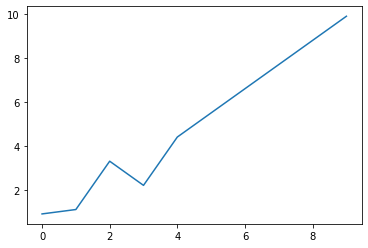

In [388]:
df.plot('0', '1')

test with scatterplot mode

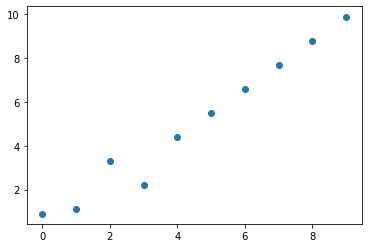

In [389]:
df.plot('0', '1', how='scatterplot')

I programmed macaco to output error if tries to plot list of strings 

# show data from columns

In [390]:
df.tolist('0')

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [391]:
df.tolist('1')

[0.9, 1.1, 3.3, 2.2, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9]

In [392]:
df.tolist('2')

['alpha', 'beta', 'gama', 'delta', 'eta', 'phi', 'kappa', 'mu', 'pi', 'sigma']

# show data

In [393]:
print(df.locateCel('0', [2,3]))
print(df.locateCel('1',0))
print(df.locateCel('2',[2,3]))
print(df.locateRow([0,1]))

[2.0, 3.0]
[0.9]
['gama', 'delta']
{'0': [[0.0, 1.0]], '1': [[0.9, 1.1]], '2': [['alpha', 'beta']]}


In [394]:
df.show()

dataframe is limited to 10 rows and 5 columns. 

|      index      |      0          |      1          |      2          
|                 |                 |                 |                 
|      0          |      0.0        |      0.9        |      alpha      
|      1          |      1.0        |      1.1        |      beta       
|      2          |      2.0        |      3.3        |      gama       
|      3          |      3.0        |      2.2        |      delta      
|      4          |      4.0        |      4.4        |      eta        
|      5          |      5.0        |      5.5        |      phi        
|      6          |      6.0        |      6.6        |      kappa      
|      7          |      7.0        |      7.7        |      mu         
|      8          |      8.0        |      8.8        |      pi         
|      9          |      9.0        |      9.9        |      sigma      


# index

In [395]:
for column in ['0', '1']:
    df.toIndxCol(column)

In [396]:
df.indexes

['0', '1']

# test removal

In [397]:
df.dimensions

[10, 4]

In [398]:
df.remove('0')

In [399]:
df.columns_dict

{'1': 'dbl', '2': 'str'}

In [400]:
df.dimensions

[10, 3]